In [2]:
import json
import itertools
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt 

In [31]:
datafile = "../washington_heatmap.json"

with open(datafile) as f:
    fulldata = json.load(f)

Neighbors:
Station ID: 3, Distance: 13.17 at Angle 79.0
Station ID: 53, Distance: 1.00 at Angle 180.0
Station ID: 72, Distance: 77.47 at Angle 61.0
Station ID: 22, Distance: 10.34 at Angle 225.0
Station ID: 58, Distance: 28.59 at Angle 92.0


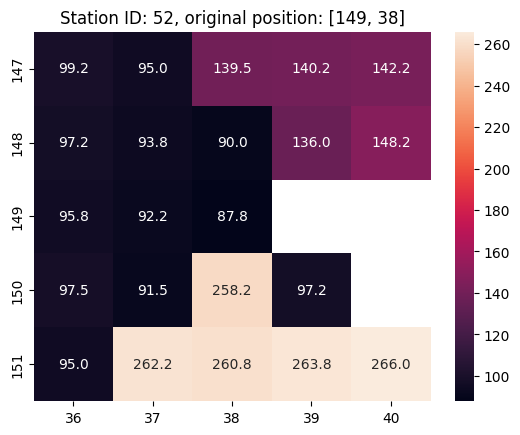

Neighbors:
Station ID: 85, Distance: 21.51 at Angle 27.0
Station ID: 3, Distance: 23.76 at Angle 171.0
Station ID: 83, Distance: 23.51 at Angle 67.0


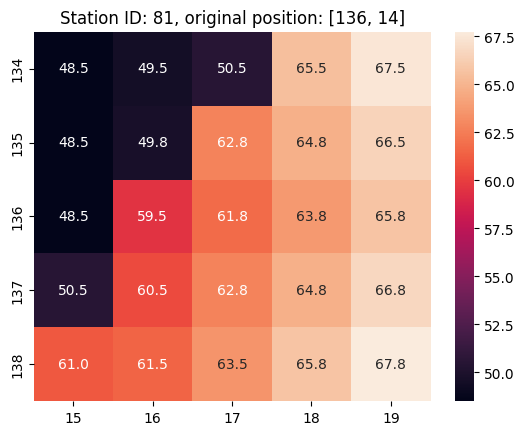

Neighbors:
Station ID: 81, Distance: 23.51 at Angle 113.0


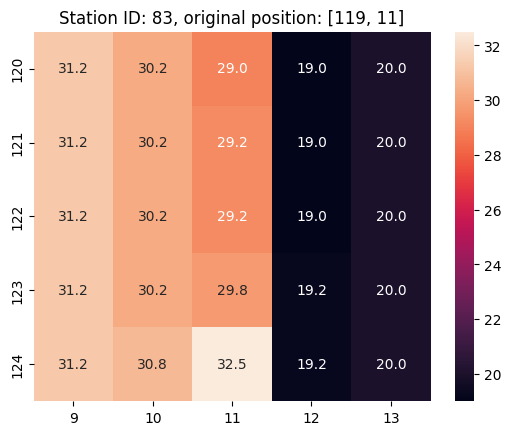

Neighbors:
Station ID: 22, Distance: 5.17 at Angle 45.0
Station ID: 53, Distance: 8.17 at Angle 22.0
Station ID: 35, Distance: 45.96 at Angle 138.0
Station ID: 34, Distance: 45.96 at Angle 132.0


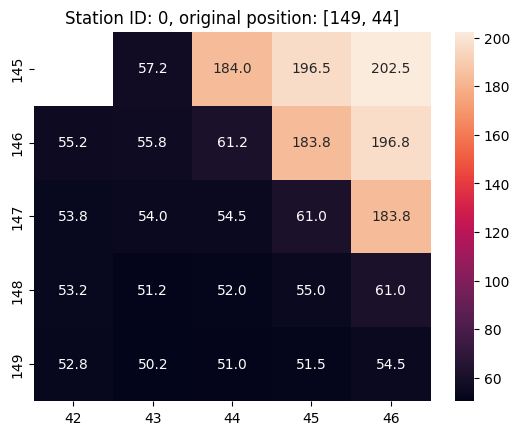

Neighbors:
Station ID: 12, Distance: 42.34 at Angle 84.0
Station ID: 22, Distance: 24.34 at Angle 77.0
Station ID: 3, Distance: 27.86 at Angle 50.0


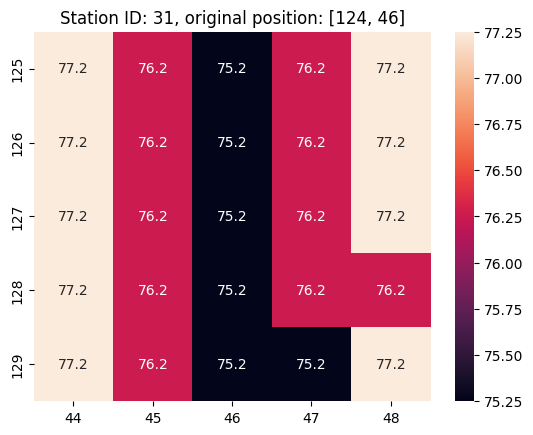

Neighbors:
Station ID: 58, Distance: 61.20 at Angle 70.0


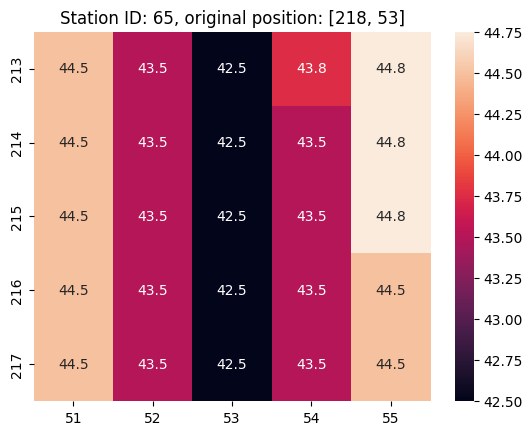

Neighbors:
Station ID: 35, Distance: 55.79 at Angle 25.0


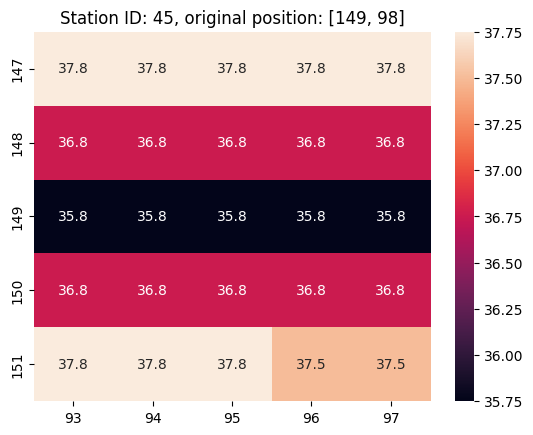

Neighbors:
Station ID: 52, Distance: 1.00 at Angle 0.0
Station ID: 0, Distance: 8.17 at Angle 202.0


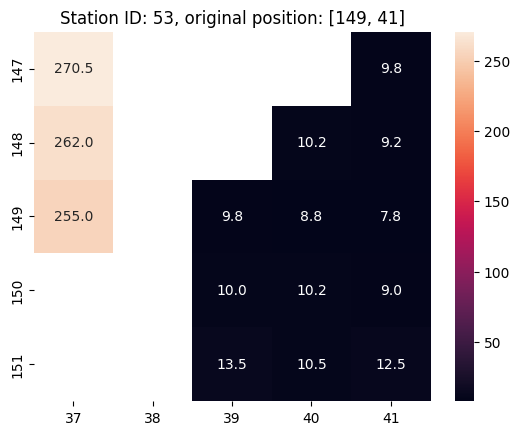

Neighbors:
Station ID: 12, Distance: 24.17 at Angle 95.0
Station ID: 96, Distance: 162.56 at Angle 221.0
Station ID: 8, Distance: 63.86 at Angle 258.0


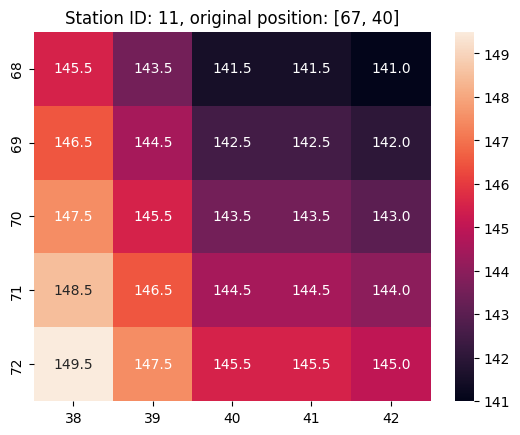

Neighbors:
Station ID: 81, Distance: 21.51 at Angle 153.0


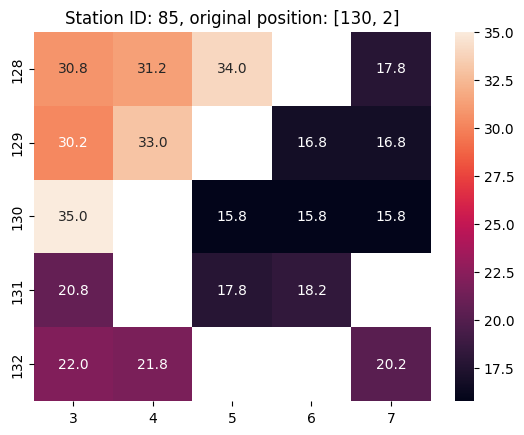

Neighbors:
Station ID: 11, Distance: 24.17 at Angle 85.0
Station ID: 31, Distance: 42.34 at Angle 96.0


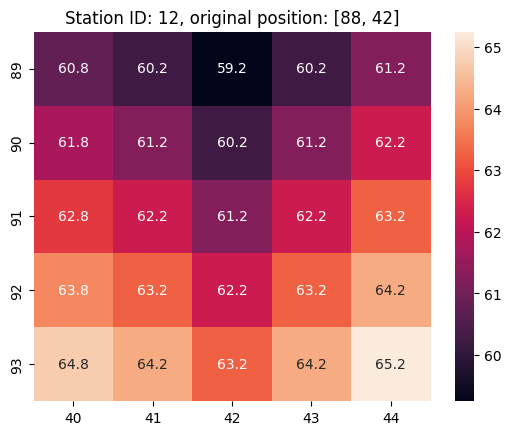

Neighbors:
Station ID: 65, Distance: 61.20 at Angle 110.0
Station ID: 66, Distance: 55.59 at Angle 91.0
Station ID: 52, Distance: 28.59 at Angle 88.0


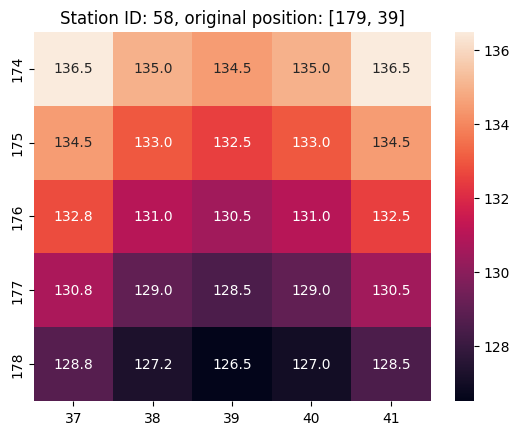

Neighbors:
Station ID: 58, Distance: 55.59 at Angle 89.0


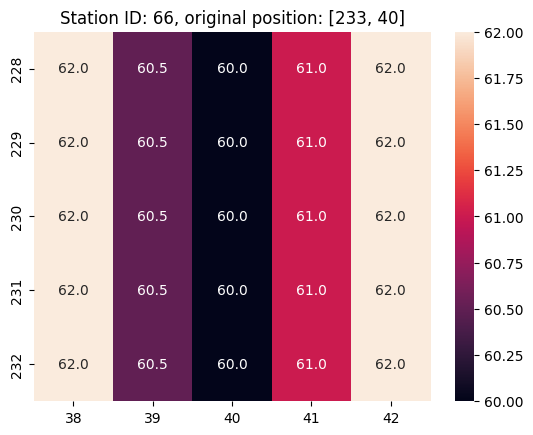

Neighbors:
Station ID: 52, Distance: 13.17 at Angle 101.0
Station ID: 81, Distance: 23.76 at Angle 9.0
Station ID: 31, Distance: 27.86 at Angle 230.0


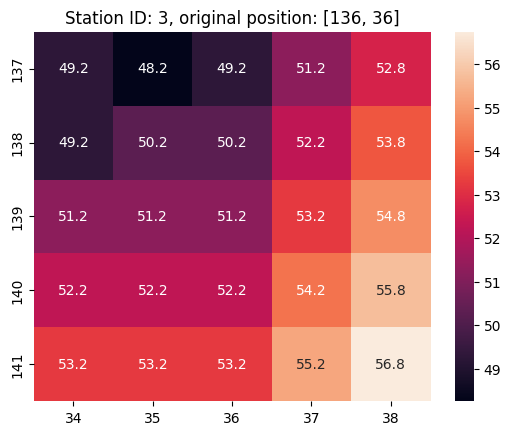

Neighbors:
Station ID: 11, Distance: 162.56 at Angle 41.0


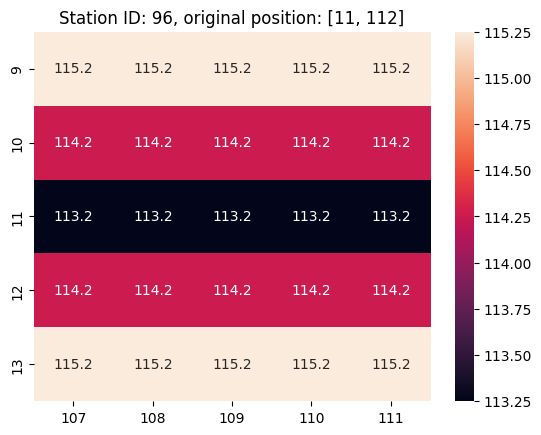

Neighbors:
Station ID: 35, Distance: 48.62 at Angle 65.0


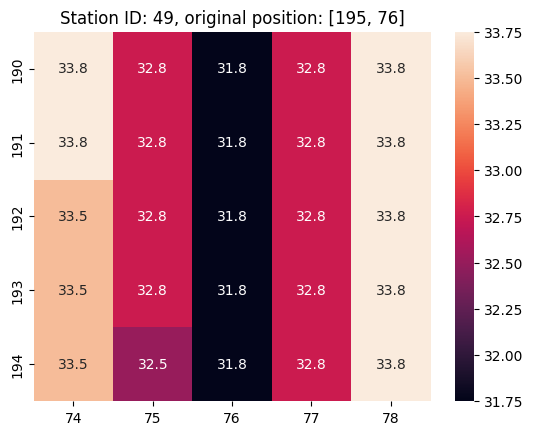

Neighbors:
Station ID: 22, Distance: 155.98 at Angle 42.0


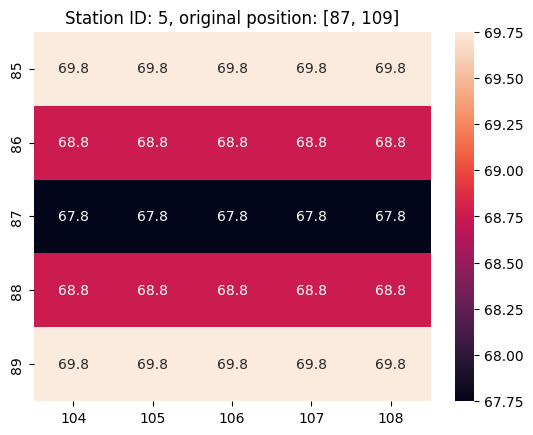

Neighbors:
Station ID: 34, Distance: 5.17 at Angle 45.0
Station ID: 45, Distance: 55.79 at Angle 205.0
Station ID: 0, Distance: 45.96 at Angle 42.0
Station ID: 49, Distance: 48.62 at Angle 115.0


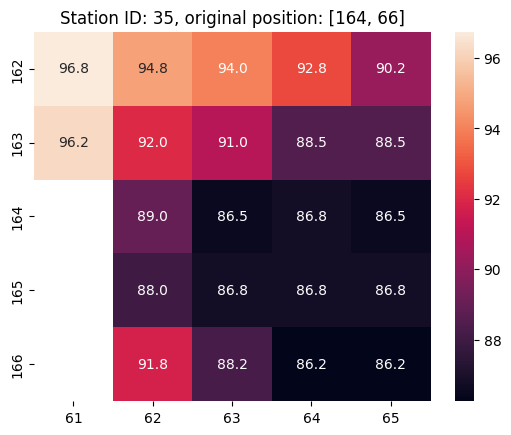

Neighbors:
Station ID: 11, Distance: 63.86 at Angle 78.0


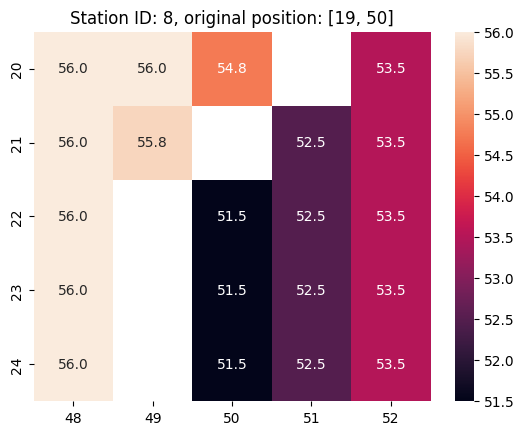

Neighbors:
Station ID: 35, Distance: 5.17 at Angle 225.0
Station ID: 0, Distance: 45.96 at Angle 48.0


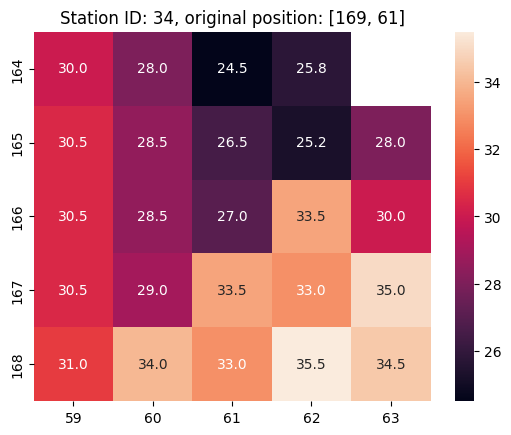

Neighbors:
Station ID: 0, Distance: 5.17 at Angle 135.0
Station ID: 52, Distance: 10.34 at Angle 45.0
Station ID: 5, Distance: 155.98 at Angle 222.0
Station ID: 31, Distance: 24.34 at Angle 257.0


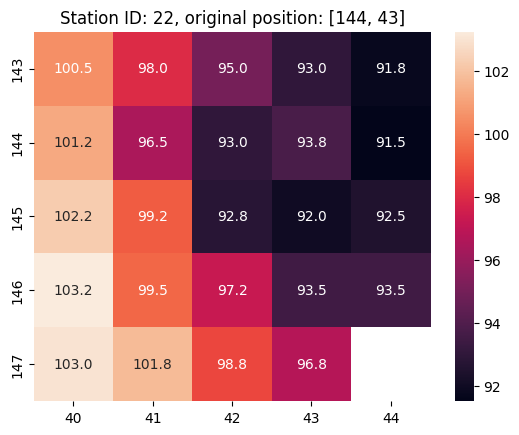

Neighbors:
Station ID: 52, Distance: 77.47 at Angle 241.0


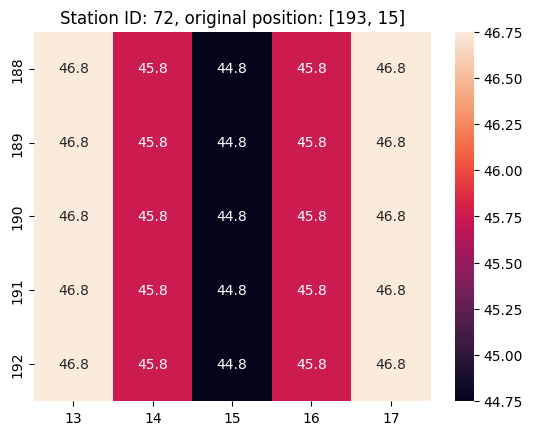

In [33]:
heatmaps = []

for station in fulldata['stations']:
    middle = station['pos']
    x_coords = [middle[0] - 2, middle[0] - 1, middle[0], middle[0] + 1, middle[0] + 2]
    y_coords = [middle[1] - 2, middle[1] - 1, middle[1], middle[1] + 1, middle[1] + 2]
    
    data = []
    for i, coords in enumerate(itertools.product(x_coords, y_coords)):
        if i % 5 == 0:
            data.append([])
        if f'({coords[0]}, {coords[1]})' in station['heatmap']:
            data[-1].append(station['heatmap'][f'({coords[0]}, {coords[1]})'])
        else:
            data[-1].append(np.nan)

    print('Neighbors:')
    for neighbor in station['neighbors']:
        print(f'Station ID: {neighbor["station_id"]}, Distance: {neighbor["distance"]:.2f} at Angle {neighbor["angle"]}')

    heatmapDataFrame = DataFrame(data, index=x_coords, columns=y_coords)
    heatmaps.append(heatmapDataFrame)
    ax = sns.heatmap(heatmapDataFrame, annot=True, fmt=".1f")
    plt.title(f'Station ID: {station["station_id"]}, original position: {station["original_pos"]}')
    plt.show()

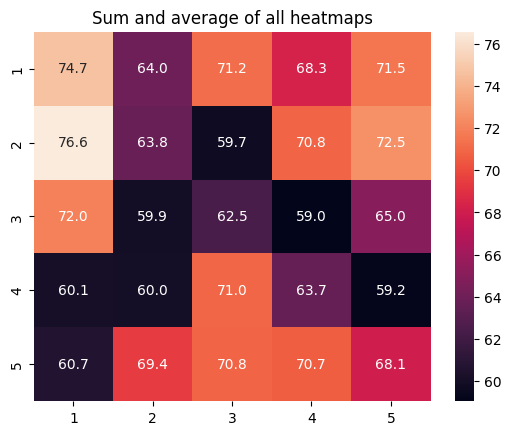

In [42]:
from functools import reduce

total_heatmap = reduce(
    lambda a, b: a.add(b, fill_value=0),
    [heatmap.set_axis([1, 2, 3, 4, 5], axis=0).set_axis([1, 2, 3, 4, 5], axis=1) for heatmap in heatmaps]
)
total_heatmap = total_heatmap.div(len(heatmaps))

ax = sns.heatmap(total_heatmap, annot=True, fmt=".1f")
plt.title('Sum and average of all heatmaps')
plt.show()